In [355]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader , TensorDataset
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt

In [356]:
# import the data
url  = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
data = pd.read_csv(url,sep=',',header=None)
data.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','DISEASE']


In [357]:
# for i in range(14):

#   print(pd.isnull(data.iloc[:,i]).value_counts())
data



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,DISEASE
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [358]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# # Создание бинарного столбца
# data['binardis'] = (data['DISEASE'] > 0).astype(int)

# # Разделение возрастов на категории
# age_bins = [1, 24, 36, 42, 50, 55, 65, 70, float('inf')]
# data['age'] = pd.cut(data['age'], bins=age_bins, labels=False)

# # Преобразование категорий в числа
# scalar = LabelEncoder()
# data['age'] = scalar.fit_transform(data['age'])

# # Обработка пропусков в столбцах 'ca' и 'thal'
data['ca'] = data['ca'].replace('?', np.nan).astype(float).fillna(0)
data['thal'] = data['thal'].replace('?', np.nan).astype(float).fillna(0)

# # Убедимся, что все данные числовые
# data = data.astype(float)


In [359]:
data.to_numpy()

array([[4., 1., 1., ..., 6., 0., 0.],
       [5., 1., 4., ..., 3., 2., 1.],
       [5., 1., 4., ..., 7., 1., 1.],
       ...,
       [4., 1., 4., ..., 7., 3., 1.],
       [4., 0., 2., ..., 3., 1., 1.],
       [1., 1., 3., ..., 3., 0., 0.]])

In [472]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from torch.utils.data import DataLoader, TensorDataset

# Нормализация данных
scalar_norm = Normalizer()
labels = data['binardis']
data1 = data.iloc[:, :-2]  # Исключаем последние два столбца (если нужно)
data1 = scalar_norm.fit_transform(data1)

# Преобразование данных в тензоры
dataT = torch.tensor(data1, dtype=torch.float32)
labels = torch.tensor(labels.values, dtype=torch.float32)

# Разделение на обучающую и тестовую выборки
train_data, test_data, train_labels, test_labels = train_test_split(
    dataT, labels, test_size=0.1, random_state=42  # Указан random_state для воспроизводимости
)

# Создание PyTorch Dataset
train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)

# Создание DataLoader
batch_size = 8
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(test_data, batch_size=batch_size)  # Изменено для консистентности


In [473]:
test_loader.dataset.tensors[1].size()

torch.Size([31])

In [474]:
def creatffn(lr,optim) :
  class Fnnmod(nn.Module):
    def __init__(self):
      super().__init__()

      self.input = nn.Linear(13,128)

      self.input = nn.Linear(13,256)

      self.hd1 = nn.Linear(256,128)

      self.hd2 = nn.Linear(128,32)

      self.hd3 = nn.Linear(32,16)

      self.output = nn.Linear(16,1)

      # self.hd1 = nn.Linear(128,64) # dtype= torch.float16 можно так все оптимизировать но это ппц как ljkuj

      # self.hd2 = nn.Linear(64,32)

      # self.hd3 = nn.Linear(32,16)

      # self.output = nn.Linear(16,1)

    def forward(self,x):
      x = F.relu(self.input(x))
      x = F.relu( self.hd1(x))
      x = F.relu( self.hd2(x))
      x = F.relu( self.hd3(x))
      x = self.output(x)
      return x

  net = Fnnmod()

  optimaze_at = getattr(torch.optim,optim)

  optimazer = optimaze_at(net.parameters(),lr)

  lossfan = nn.BCEWithLogitsLoss()
  return lossfan,optimazer,net

In [478]:
def create_ffn(lr, optim):
    class FNNModel(nn.Module):
        def __init__(self):
            super().__init__()
            self.input = nn.Linear(13, 256)  # Исправлено дублирование слоя
            self.hd1 = nn.Linear(256, 128)
            self.hd2 = nn.Linear(128, 32)
            self.hd3 = nn.Linear(32, 16)
            self.output = nn.Linear(16, 1)

        def forward(self, x):
            x = F.relu(self.input(x))
            x = F.relu(self.hd1(x))
            x = F.relu(self.hd2(x))
            x = F.relu(self.hd3(x))
            x = self.output(x)
            return x

    # Создаем модель
    net = FNNModel()

    # Инициализируем оптимизатор
    optimizer_class = getattr(torch.optim, optim, None)
    if optimizer_class is None:
        raise ValueError(f"Оптимизатор '{optim}' не найден в torch.optim.")

    optimizer = optimizer_class(net.parameters(), lr=lr)

    # Функция потерь
    loss_fn = nn.BCEWithLogitsLoss()
    return loss_fn, optimizer, net

In [479]:
lossfan,optimazer,net =create_ffn(0.01, 'Adam')
X,y = next(iter(train_loader))
yhat = net(X)
print(yhat,y)


tensor([[-0.0077],
        [-0.0050],
        [-0.0059],
        [-0.0073],
        [-0.0064],
        [-0.0058],
        [-0.0070],
        [-0.0052]], grad_fn=<AddmmBackward0>) tensor([0., 0., 1., 1., 1., 1., 0., 0.])


In [480]:
# def creatModul(opt,lr):
#   epoch = 300
#   lossfan,optimazer,net = creatffn(lr,opt)
#   trainAcc = []
#   testAcc = []
#   losses = [0] *epoch
#   for i in  range(epoch):
#     batch_los = []
#     batch_Acc = []
#     net.train()
#     for X,y in train_loader : # train_lod shape is  = 8
#       # print(X.size())  # X.size() = 8

#       yhat = net(X)

#       loss = lossfan(yhat.reshape(-1),y)
#       # learning
#       optimazer.zero_grad()
#       loss.backward()
#       optimazer.step()

#       batch_los.append(loss.item())
#       #  начиная от сюда проверяем
#       # не дадело ,но это для мулти класса bar = (np.argmax(yhat,axis = 1) == y )) / len(y)
#       batch_Acc.append( 100*torch.mean(((yhat>0) == y).float()).item() )





  #   # net.eval()
  #   X,y = next(iter(test_loader)) # extract X,y from test dataloader

  #   # with torch.no_grad(): # deactivates autograd
  #   yHat = net(X)
  #   testAcc.append( 100*torch.mean(((yHat>0) == y).float()).item() )
  #   losses[i] = np.mean(batch_los)
  #   trainAcc.append( np.mean(batch_Acc) )


  # return trainAcc,testAcc,losses





In [484]:
import numpy as np
import torch

def create_module(opt, lr, train_loader, test_loader):
    epoch = 300

    loss_fn, optimizer, net = create_ffn(lr,opt)  # Функция create_ffn должна быть определена заранее

    train_acc = []
    test_acc = []
    losses = [0] * epoch

    for i in range(epoch):
        batch_loss = []
        batch_acc = []

        # Обучение модели
        net.train()
        for X, y in train_loader:  # train_loader должен быть задан и возвращать батчи
                     # Прогноз
            y_hat = net(X)

            y_hat = y_hat.reshape(-1)  # Удаляем последнюю размерность

            loss = loss_fn(y_hat, y)

            # Оптимизация
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Логирование потерь и точности
            batch_loss.append(loss.item())
            acc = 100 * torch.mean(((y_hat > 0) == y).float()).item()
            batch_acc.append(acc)

        # Тестирование модели
        net.eval()
        with torch.no_grad():  # Отключаем градиенты для тестирования
            X_test, y_test = next(iter(test_loader))  # Извлекаем данные из тестового загрузчика
            y_hat_test = net(X_test)
            test_accuracy = 100 * torch.mean(((y_hat_test > 0) == y_test).float()).item()
            test_acc.append(test_accuracy)

        # Логирование потерь и точности за эпоху
        losses[i] = np.mean(batch_loss)
        train_acc.append(batch_acc[-1])

    return train_acc, test_acc, losses


In [485]:
trainAcc,testAcc,losses = create_module('Adam',0.1, train_loader, test_loader)

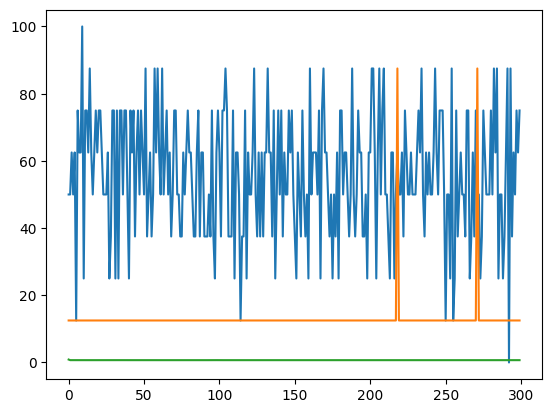

In [486]:
plt.plot(trainAcc)
plt.plot(testAcc)
plt.plot(losses)
